In [ ]:
#Enahanced Ensemble MLP with hyperparameter optimized with Bayesian.
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Concatenate
import matplotlib.pyplot as plt
import time

# Check if using GPU or CPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('You are using a CPU backend.')
else:
    print('You are using a GPU backend:', device_name)

# Load your dataset from the Excel file
data = pd.read_excel('DatasetIoV.xlsx')
target_column = 'Collision'

# Select a subset of the dataset (60,000 rows)
subset_size = 60000
df_subset = data.head(subset_size)

# Split the subset dataset into features and target
X = df_subset.drop(columns=[target_column])
y = df_subset[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for the 1D CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create a CNN model for feature extraction
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())

# Extract features using the CNN
X_train_features = cnn_model.predict(X_train_cnn)
X_test_features = cnn_model.predict(X_test_cnn)

# Create an ensemble of MLP models
num_models = 2  # You can adjust the number of models in the ensemble
mlp_models = []

for i in range(num_models):
    mlp_model = Sequential()
    mlp_model.add(Dense(50, activation='relu', input_shape=(X_train_features.shape[1],)))
    mlp_model.add(Dense(1, activation='linear'))  # Output layer
    mlp_models.append(mlp_model)

# Create an ensemble model by averaging predictions from all members
inputs = Input(shape=(X_train_features.shape[1],))
outputs = [model(inputs) for model in mlp_models]
ensemble_output = Concatenate()(outputs)
ensemble_output = Dense(1, activation='linear')(ensemble_output)
ensemble_model = Model(inputs=inputs, outputs=ensemble_output)

# Compile the ensemble model
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                       loss='mean_squared_error')

# Measure execution time
start_time = time.time()

# Train the ensemble model
history = ensemble_model.fit(X_train_features, y_train, epochs=50, batch_size=16,
                             validation_split=0.2, verbose=1)

# Evaluate the ensemble model using MSE
y_pred = ensemble_model.predict(X_test_features)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

end_time = time.time()
execution_time = end_time - start_time

print(f'Subset Size: {subset_size}, Execution Time: {execution_time:.2f} seconds')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
####Proposed training and testing time computation
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Concatenate
import matplotlib.pyplot as plt
import time

# Check if using GPU or CPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('You are using a CPU backend.')
else:
    print('You are using a GPU backend:', device_name)

# Load your dataset from the Excel file
data = pd.read_excel('DatasetIoV.xlsx')
target_column = 'Collision'

# Select a subset of the dataset (60,000 rows)
subset_size = 60000
df_subset = data.head(subset_size)

# Split the subset dataset into features and target
X = df_subset.drop(columns=[target_column])
y = df_subset[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for the 1D CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create a CNN model for feature extraction
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())

# Measure execution time for feature extraction
start_cnn_time = time.time()

# Extract features using the CNN
X_train_features = cnn_model.predict(X_train_cnn)
X_test_features = cnn_model.predict(X_test_cnn)

end_cnn_time = time.time()
cnn_time = end_cnn_time - start_cnn_time

# Create an ensemble of MLP models
num_models = 2  # You can adjust the number of models in the ensemble
mlp_models = []

for i in range(num_models):
    mlp_model = Sequential()
    mlp_model.add(Dense(50, activation='relu', input_shape=(X_train_features.shape[1],)))
    mlp_model.add(Dense(1, activation='linear'))  # Output layer
    mlp_models.append(mlp_model)

# Create an ensemble model by averaging predictions from all members
inputs = Input(shape=(X_train_features.shape[1],))
outputs = [model(inputs) for model in mlp_models]
ensemble_output = Concatenate()(outputs)
ensemble_output = Dense(1, activation='linear')(ensemble_output)
ensemble_model = Model(inputs=inputs, outputs=ensemble_output)

# Compile the ensemble model
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                       loss='mean_squared_error')

# Measure execution time for training
start_train_time = time.time()

# Train the ensemble model
history = ensemble_model.fit(X_train_features, y_train, epochs=50, batch_size=16,
                             validation_split=0.2, verbose=1)

end_train_time = time.time()
training_time = end_train_time - start_train_time

# Measure execution time for testing
start_test_time = time.time()

# Evaluate the ensemble model using MSE
y_pred = ensemble_model.predict(X_test_features)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

end_test_time = time.time()
testing_time = end_test_time - start_test_time

# Total execution time
execution_time = training_time + testing_time + cnn_time

print(f'Subset Size: {subset_size}')
print(f'CNN Feature Extraction Time: {cnn_time:.2f} seconds')
print(f'Training Time: {training_time:.2f} seconds')
print(f'Testing Time: {testing_time:.2f} seconds')
print(f'Total Execution Time: {execution_time:.2f} seconds')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
##Proposed under adverse weather condition
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Concatenate
import matplotlib.pyplot as plt
import time
np.random.seed(42)
# Check if using GPU or CPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('You are using a CPU backend.')
else:
    print('You are using a GPU backend:', device_name)

# Load your dataset from the Excel file
data = pd.read_excel('DatasetIoV.xlsx')
target_column = 'Collision'
environment_column = 'Nature of environment'

# Define dataset sizes to test
sizes = [100000]

# Function to train and evaluate the model under specific environmental conditions
def train_and_evaluate(df):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Reshape the data for the 1D CNN
    X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Create a CNN model for feature extraction
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())

    # Extract features using the CNN
    X_train_features = cnn_model.predict(X_train_cnn)
    X_test_features = cnn_model.predict(X_test_cnn)

    # Create an ensemble of MLP models
    num_models = 2  # You can adjust the number of models in the ensemble
    mlp_models = []

    for i in range(num_models):
        mlp_model = Sequential()
        mlp_model.add(Dense(50, activation='relu', input_shape=(X_train_features.shape[1],)))
        mlp_model.add(Dense(1, activation='linear'))  # Output layer
        mlp_models.append(mlp_model)

    # Create an ensemble model by averaging predictions from all members
    inputs = Input(shape=(X_train_features.shape[1],))
    outputs = [model(inputs) for model in mlp_models]
    ensemble_output = Concatenate()(outputs)
    ensemble_output = Dense(1, activation='linear')(ensemble_output)
    ensemble_model = Model(inputs=inputs, outputs=ensemble_output)

    # Compile the ensemble model
    ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                           loss='mean_squared_error')

    # Measure execution time
    start_time = time.time()

    # Train the ensemble model
    history = ensemble_model.fit(X_train_features, y_train, epochs=50, batch_size=16,
                                 validation_split=0.2, verbose=0)

    # Evaluate the ensemble model using MSE
    y_pred = ensemble_model.predict(X_test_features)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    end_time = time.time()
    execution_time = end_time - start_time

    return mse, rmse, history, execution_time

# Dictionary to store results
results = {}

# Test with different dataset sizes
for size in sizes:
    df_subset = data.head(size)
    data_adverse = df_subset[df_subset[environment_column] == 2]

    # Check if there's enough data for adverse conditions
    if len(data_adverse) > 0:
        mse_adverse, rmse_adverse, history_adverse, exec_time_adverse = train_and_evaluate(data_adverse)

        results[size] = {
            'MSE': mse_adverse,
            'RMSE': rmse_adverse,
            'Execution Time': exec_time_adverse
        }

        # Print results
        print(f"Dataset Size: {size}")
        print(f'Adverse Environment - MSE: {mse_adverse}, RMSE: {rmse_adverse}, Execution Time: {exec_time_adverse:.2f} seconds')

        # Plot training loss and validation loss
        plt.figure()
        plt.plot(history_adverse.history['loss'], label='Training Loss')
        plt.plot(history_adverse.history['val_loss'], label='Validation Loss')
        plt.title(f'Adverse Environment - Size {size}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    else:
        print(f"Dataset Size: {size} - No adverse weather data available.")

# Optionally, you can save the results to a file
results_df = pd.DataFrame(results).T
results_df.to_excel('model_results.xlsx', sheet_name='Results')


In [ ]:
##BOEEMLP
##hyper parameter tuning
## found Learning rate 0.0001 epoch 50 batch size 16

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Concatenate
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import matplotlib.pyplot as plt

# Load your dataset from the Excel file
data = pd.read_excel('DatasetIoV.xlsx')
target_column = 'Collision'

# Select a subset of the dataset (e.g., first 1000 rows)
subset_size = 60000
df_subset = data.head(subset_size)

# Split the subset dataset into features and target
X = df_subset.drop(columns=[target_column])
y = df_subset[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for the 1D CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create a CNN model for feature extraction
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())

# Extract features using the CNN
X_train_features = cnn_model.predict(X_train_cnn)
X_test_features = cnn_model.predict(X_test_cnn)

# Define the search space for hyperparameter tuning
search_space = {
    'learning_rate': hp.choice('learning_rate', [1e-5, 1e-4, 1e-3, 1e-2]),  # Learning rate
    'batch_size': hp.choice('batch_size', [16, 32, 64, 100]),  # Batch size
    'epochs': hp.choice('epochs', [10, 30, 50])  # Number of epochs
}

# Create a function to build and train the ensemble model
def train_ensemble_model(params):
    learning_rate = params['learning_rate']
    batch_size = params['batch_size']
    epochs = params['epochs']

    num_models = 2
    dense_units = 50

    mlp_models = []
    for i in range(num_models):
        mlp_model = Sequential()
        mlp_model.add(Dense(dense_units, activation='relu', input_shape=(X_train_features.shape[1],)))
        mlp_model.add(Dense(1, activation='linear'))  # Output layer
        mlp_models.append(mlp_model)

    inputs = Input(shape=(X_train_features.shape[1],))
    outputs = [model(inputs) for model in mlp_models]
    ensemble_output = Concatenate()(outputs)
    ensemble_output = Dense(1, activation='linear')(ensemble_output)
    ensemble_model = Model(inputs=inputs, outputs=ensemble_output)

    ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                           loss='mean_squared_error')

    history = ensemble_model.fit(X_train_features, y_train, epochs=epochs, batch_size=batch_size,
                                 validation_split=0.2, verbose=0)

    # Evaluate the ensemble model using MSE
    y_pred = ensemble_model.predict(X_test_features)
    mse = mean_squared_error(y_test, y_pred)

    return {'loss': mse, 'status': STATUS_OK}

# Define the objective function for hyperparameter optimization
def objective(params):
    result = train_ensemble_model(params)
    return result

# Perform Bayesian Optimization
trials = Trials()
best = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=30, trials=trials, verbose=1)

# Extract the MSE and RMSE values for each combination
results = []

for trial in trials.trials:
    params = trial['misc']['vals']
    mse = trial['result']['loss']
    rmse = np.sqrt(mse)

    result = {
        'learning_rate': search_space['learning_rate'][int(params['learning_rate'][0])],
        'batch_size': search_space['batch_size'][int(params['batch_size'][0])],
        'epochs': search_space['epochs'][int(params['epochs'][0])],
        'MSE': mse,
        'RMSE': rmse,
    }

    results.append(result)

# Print combinations and their MSE and RMSE
for i, result in enumerate(results):
    print(f'Combination {i+1}:')
    print(f'Learning Rate: {result["learning_rate"]}')
    print(f'Batch Size: {result["batch_size"]}')
    print(f'Epochs: {result["epochs"]}')
    print(f'MSE: {result["MSE"]}')
    print(f'RMSE: {result["RMSE"]}')
    print()


375/375 [==============================] - 1s 2ms/step

375/375 [==============================] - 1s 2ms/step

375/375 [==============================] - 1s 2ms/step

375/375 [==============================] - 1s 2ms/step

375/375 [==============================] - 1s 2ms/step

375/375 [==============================] - 1s 2ms/step

375/375 [==============================] - 1s 2ms/step

375/375 [==============================] - 1s 2ms/step

375/375 [==============================] - 1s 2ms/step

375/375 [==============================] - 1s 2ms/step

375/375 [==============================] - 1s 2ms/step

375/375 [==============================] - 1s 2ms/step

375/375 [==============================] - 1s 3ms/step

375/375 [==============================] - 1s 2ms/step

375/375 [==============================] - 1s 2ms/step

375/375 [==============================] - 1s 2ms/step

375/375 [==============================] - 1s 2ms/step

375/375 [==============================] - 1s 2m

In [ ]:
##
##checking suitable number of MLP models from 1-5
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Concatenate
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import matplotlib.pyplot as plt

# Load your dataset from the Excel file
data = pd.read_excel('DatasetIoV.xlsx')
target_column = 'Collision'

# Select a subset of the dataset (e.g., first 1000 rows)
subset_size = 60000
df_subset = data.head(subset_size)

# Split the subset dataset into features and target
X = df_subset.drop(columns=[target_column])
y = df_subset[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for the 1D CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create a CNN model for feature extraction
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())

# Extract features using the CNN
X_train_features = cnn_model.predict(X_train_cnn)
X_test_features = cnn_model.predict(X_test_cnn)

# Define the best hyperparameters
best_learning_rate = 0.0001
best_batch_size = 16
best_epochs = 50

# Define the number of ensemble models to try (from 1 to 5)
num_models_to_try = [1, 2, 3, 4, 5]

results = []

# Loop over different numbers of ensemble models
for num_models in num_models_to_try:
    print(f"Training {num_models} ensemble model(s)...")

    mlp_models = []
    for i in range(num_models):
        mlp_model = Sequential()
        mlp_model.add(Dense(50, activation='relu', input_shape=(X_train_features.shape[1],)))
        mlp_model.add(Dense(1, activation='linear'))  # Output layer
        mlp_models.append(mlp_model)

    inputs = Input(shape=(X_train_features.shape[1],))
    outputs = [model(inputs) for model in mlp_models]
    ensemble_output = Concatenate()(outputs)
    ensemble_output = Dense(1, activation='linear')(ensemble_output)
    ensemble_model = Model(inputs=inputs, outputs=ensemble_output)

    ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_learning_rate),
                           loss='mean_squared_error')

    history = ensemble_model.fit(X_train_features, y_train, epochs=best_epochs, batch_size=best_batch_size,
                                 validation_split=0.2, verbose=0)

    # Evaluate the ensemble model using MSE
    y_pred = ensemble_model.predict(X_test_features)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    result = {
        'Num Models': num_models,
        'MSE': mse,
        'RMSE': rmse,
    }

    results.append(result)

# Print results for different numbers of ensemble models
for result in results:
    print(f'Number of Ensemble Models: {result["Num Models"]}')
    print(f'MSE: {result["MSE"]}')
    print(f'RMSE: {result["RMSE"]}')
    print()


375/375 [==============================] - 1s 1ms/step
Training 1 ensemble model(s)...
375/375 [==============================] - 1s 2ms/step
Training 2 ensemble model(s)...
375/375 [==============================] - 1s 2ms/step
Training 3 ensemble model(s)...
375/375 [==============================] - 1s 2ms/step
Training 4 ensemble model(s)...
375/375 [==============================] - 1s 2ms/step
Training 5 ensemble model(s)...
375/375 [==============================] - 1s 2ms/step
Number of Ensemble Models: 1
MSE: 9.567047438781528e-05
RMSE: 0.00978112848232837

Number of Ensemble Models: 2
MSE: 2.9523936410215473e-05
RMSE: 0.0054335933239630175

Number of Ensemble Models: 3
MSE: 5.2019368328730056e-05
RMSE: 0.00721244537786804

Number of Ensemble Models: 4
MSE: 1.969722546443968e-05
RMSE: 0.00443815563769903

Number of Ensemble Models: 5
MSE: 2.912778862180933e-05
RMSE: 0.005397016640868298



397/397 [==============================] - 1s 1ms/step
Epoch 1/50
5705/5705 [==============================] - 14s 2ms/step - loss: 0.0248 - val_loss: 0.0014
Epoch 2/50
5705/5705 [==============================] - 14s 2ms/step - loss: 8.1823e-04 - val_loss: 4.5265e-04
Epoch 3/50
5705/5705 [==============================] - 14s 2ms/step - loss: 3.3834e-04 - val_loss: 2.1984e-04
Epoch 4/50
5705/5705 [==============================] - 14s 2ms/step - loss: 1.6827e-04 - val_loss: 1.3208e-04
Epoch 5/50
5705/5705 [==============================] - 13s 2ms/step - loss: 8.5031e-05 - val_loss: 7.9746e-05
Epoch 6/50
5705/5705 [==============================] - 13s 2ms/step - loss: 5.0174e-05 - val_loss: 6.4706e-05
Epoch 7/50
5705/5705 [==============================] - 14s 2ms/step - loss: 3.4147e-05 - val_loss: 5.5823e-05
Epoch 8/50
5705/5705 [==============================] - 14s 2ms/step - loss: 2.7461e-05 - val_loss: 4.9441e-05
Epoch 9/50
5705/5705 [==============================] - 14s 2ms/s

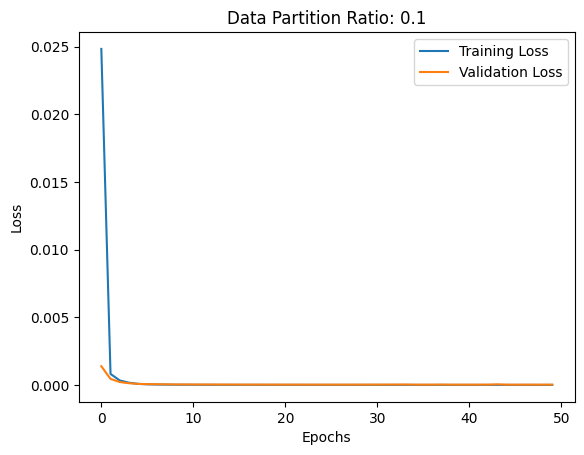

793/793 [==============================] - 1s 2ms/step
Epoch 1/50
5071/5071 [==============================] - 12s 2ms/step - loss: 0.0198 - val_loss: 0.0018
Epoch 2/50
5071/5071 [==============================] - 12s 2ms/step - loss: 9.0451e-04 - val_loss: 4.6009e-04
Epoch 3/50
5071/5071 [==============================] - 12s 2ms/step - loss: 2.6595e-04 - val_loss: 1.3877e-04
Epoch 4/50
5071/5071 [==============================] - 11s 2ms/step - loss: 9.3346e-05 - val_loss: 5.9036e-05
Epoch 5/50
5071/5071 [==============================] - 13s 2ms/step - loss: 5.3667e-05 - val_loss: 3.5233e-05
Epoch 6/50
5071/5071 [==============================] - 13s 2ms/step - loss: 3.9272e-05 - val_loss: 2.7975e-05
Epoch 7/50
5071/5071 [==============================] - 13s 2ms/step - loss: 3.1221e-05 - val_loss: 2.2395e-05
Epoch 8/50
5071/5071 [==============================] - 13s 3ms/step - loss: 2.7191e-05 - val_loss: 2.7875e-05
Epoch 9/50
5071/5071 [==============================] - 12s 2ms/s

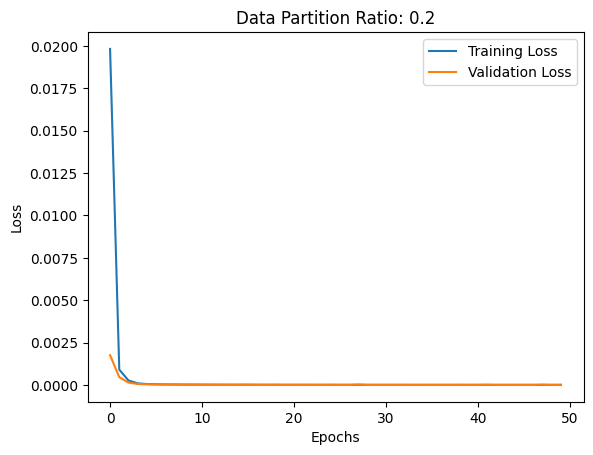

1189/1189 [==============================] - 2s 1ms/step
Epoch 1/50
4438/4438 [==============================] - 11s 2ms/step - loss: 0.0380 - val_loss: 0.0040
Epoch 2/50
4438/4438 [==============================] - 10s 2ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 3/50
4438/4438 [==============================] - 10s 2ms/step - loss: 8.9990e-04 - val_loss: 6.2631e-04
Epoch 4/50
4438/4438 [==============================] - 10s 2ms/step - loss: 4.6220e-04 - val_loss: 3.7649e-04
Epoch 5/50
4438/4438 [==============================] - 11s 2ms/step - loss: 2.2868e-04 - val_loss: 1.5702e-04
Epoch 6/50
4438/4438 [==============================] - 9s 2ms/step - loss: 1.2509e-04 - val_loss: 9.1613e-05
Epoch 7/50
4438/4438 [==============================] - 10s 2ms/step - loss: 7.3295e-05 - val_loss: 4.9135e-05
Epoch 8/50
4438/4438 [==============================] - 10s 2ms/step - loss: 5.1134e-05 - val_loss: 3.8442e-05
Epoch 9/50
4438/4438 [==============================] - 10s 2ms/step - l

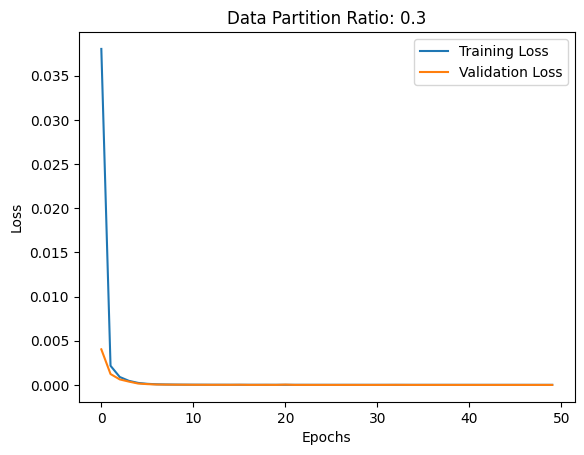

1585/1585 [==============================] - 2s 1ms/step
Epoch 1/50
3804/3804 [==============================] - 9s 2ms/step - loss: 0.0781 - val_loss: 0.0133
Epoch 2/50
3804/3804 [==============================] - 9s 2ms/step - loss: 0.0068 - val_loss: 0.0033
Epoch 3/50
3804/3804 [==============================] - 9s 2ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 4/50
3804/3804 [==============================] - 9s 2ms/step - loss: 0.0010 - val_loss: 6.9113e-04
Epoch 5/50
3804/3804 [==============================] - 8s 2ms/step - loss: 6.4186e-04 - val_loss: 4.5913e-04
Epoch 6/50
3804/3804 [==============================] - 9s 2ms/step - loss: 4.7156e-04 - val_loss: 3.5871e-04
Epoch 7/50
3804/3804 [==============================] - 9s 2ms/step - loss: 3.5594e-04 - val_loss: 2.7476e-04
Epoch 8/50
3804/3804 [==============================] - 8s 2ms/step - loss: 2.7874e-04 - val_loss: 2.4562e-04
Epoch 9/50
3804/3804 [==============================] - 9s 2ms/step - loss: 2.2424e-04 - va

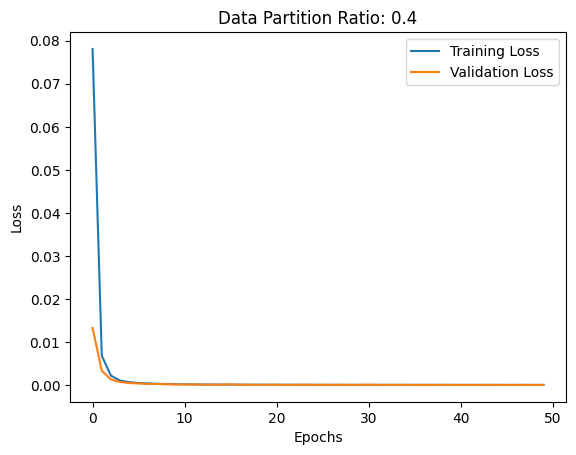

1981/1981 [==============================] - 3s 2ms/step
Epoch 1/50
3170/3170 [==============================] - 8s 2ms/step - loss: 0.0340 - val_loss: 0.0038
Epoch 2/50
3170/3170 [==============================] - 8s 3ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 3/50
3170/3170 [==============================] - 7s 2ms/step - loss: 7.8971e-04 - val_loss: 5.6646e-04
Epoch 4/50
3170/3170 [==============================] - 7s 2ms/step - loss: 4.2115e-04 - val_loss: 3.7846e-04
Epoch 5/50
3170/3170 [==============================] - 8s 2ms/step - loss: 2.6025e-04 - val_loss: 2.1548e-04
Epoch 6/50
3170/3170 [==============================] - 7s 2ms/step - loss: 1.7234e-04 - val_loss: 1.7503e-04
Epoch 7/50
3170/3170 [==============================] - 8s 2ms/step - loss: 1.2029e-04 - val_loss: 1.3410e-04
Epoch 8/50
3170/3170 [==============================] - 7s 2ms/step - loss: 8.8187e-05 - val_loss: 9.3099e-05
Epoch 9/50
3170/3170 [==============================] - 8s 2ms/step - loss: 6.8

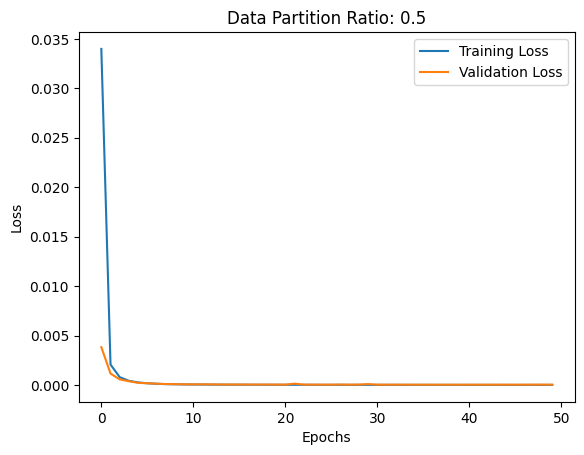

In [ ]:
##various data partition ratio with best hyper and dense

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Concatenate
import matplotlib.pyplot as plt

# Load your dataset from the Excel file
data = pd.read_excel('DatasetIoV.xlsx')
target_column = 'Collision'

# Select a subset of the dataset (e.g., first 1000 rows)
#subset_size = 60000
subset_size=126776
df_subset = data.head(subset_size)

# Split the subset dataset into features and target
X = df_subset.drop(columns=[target_column])
y = df_subset[target_column]

# Set a list of data partition ratios (test_size)
test_size_list = [0.1, 0.2, 0.3, 0.4, 0.5]

for test_size in test_size_list:
    # Split the dataset into training and testing sets with different test_size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Normalize the features
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Reshape the data for the 1D CNN
    X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Create a CNN model for feature extraction
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())

    # Extract features using the CNN
    X_train_features = cnn_model.predict(X_train_cnn)
    X_test_features = cnn_model.predict(X_test_cnn)

    # Set the best hyperparameters
    best_learning_rate = 0.0001
    best_batch_size = 16
    best_epochs = 50

    # Create an ensemble of MLP models
    num_models = 2
    dense_units = 50
    mlp_models = []

    for i in range(num_models):
        mlp_model = Sequential()
        mlp_model.add(Dense(dense_units, activation='relu', input_shape=(X_train_features.shape[1],)))
        mlp_model.add(Dense(1, activation='linear'))  # Output layer
        mlp_models.append(mlp_model)

    # Create an ensemble model by averaging predictions from all members
    inputs = Input(shape=(X_train_features.shape[1],))
    outputs = [model(inputs) for model in mlp_models]
    ensemble_output = Concatenate()(outputs)
    ensemble_output = Dense(1, activation='linear')(ensemble_output)
    ensemble_model = Model(inputs=inputs, outputs=ensemble_output)

    # Compile the ensemble model
    ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_learning_rate),
                           loss='mean_squared_error')

    # Train the ensemble model
    history = ensemble_model.fit(X_train_features, y_train, epochs=best_epochs, batch_size=best_batch_size,
                                 validation_split=0.2, verbose=1)

    # Evaluate the ensemble model using MSE
    y_pred = ensemble_model.predict(X_test_features)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    print(f'Test Size (Data Partition Ratio): {test_size}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print()

    # Plot training loss and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Data Partition Ratio: {test_size}')
    plt.legend()
    plt.show()


In [ ]:
#### Finding dense units with best set of hyper parameters

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Concatenate
import matplotlib.pyplot as plt

# Load your dataset from the Excel file
data = pd.read_excel('DatasetIoV.xlsx')
target_column = 'Collision'

# Select a subset of the dataset (e.g., first 1000 rows)
subset_size = 60000
df_subset = data.head(subset_size)

# Split the subset dataset into features and target
X = df_subset.drop(columns=[target_column])
y = df_subset[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for the 1D CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create a CNN model for feature extraction
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())

# Extract features using the CNN
X_train_features = cnn_model.predict(X_train_cnn)
X_test_features = cnn_model.predict(X_test_cnn)

# Set the best hyperparameters
best_learning_rate = 0.0001
best_batch_size = 16
best_epochs = 50

# Try different numbers of dense units
#dense_units_list = [25, 32, 50, 64, 100, 128, 150]
dense_units_list = [50, 64]
for dense_units in dense_units_list:
    mlp_models = []
    for i in range(2):  # Number of MLP models in the ensemble
        mlp_model = Sequential()
        mlp_model.add(Dense(dense_units, activation='relu', input_shape=(X_train_features.shape[1],)))
        mlp_model.add(Dense(1, activation='linear'))  # Output layer
        mlp_models.append(mlp_model)

    inputs = Input(shape=(X_train_features.shape[1],))
    outputs = [model(inputs) for model in mlp_models]
    ensemble_output = Concatenate()(outputs)
    ensemble_output = Dense(1, activation='linear')(ensemble_output)
    ensemble_model = Model(inputs=inputs, outputs=ensemble_output)

    ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_learning_rate),
                           loss='mean_squared_error')

    history = ensemble_model.fit(X_train_features, y_train, epochs=best_epochs, batch_size=best_batch_size,
                                 validation_split=0.2, verbose=1)

    # Evaluate the ensemble model using MSE
    y_pred = ensemble_model.predict(X_test_features)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Dense Units: {dense_units}')
    print(f'Best Learning Rate: {best_learning_rate}')
    print(f'Best Batch Size: {best_batch_size}')
    print(f'Best Epochs: {best_epochs}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print()



375/375 [==============================] - 0s 1ms/step
Epoch 1/50
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0701 - val_loss: 0.0206
Epoch 2/50
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0119 - val_loss: 0.0060
Epoch 3/50
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 4/50
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 5/50
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0010 - val_loss: 8.1814e-04
Epoch 6/50
2400/2400 [==============================] - 6s 2ms/step - loss: 7.8119e-04 - val_loss: 5.6320e-04
Epoch 7/50
2400/2400 [==============================] - 6s 2ms/step - loss: 6.2585e-04 - val_loss: 4.6063e-04
Epoch 8/50
2400/2400 [==============================] - 5s 2ms/step - loss: 5.2771e-04 - val_loss: 3.8678e-04
Epoch 9/50
2400/2400 [==============================] - 6s 3ms/step - loss: 4.5234e-04 - val_loss: 4.